In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
weather_data = pd.read_csv('Data/Data/weather.csv')

### List of contents: 
   1. Original dataset info
   2. The dataset after tidy
   3. Set the date as index
   4. The rows where tmax is maximum and tmin is minimum
   5. Monthly average, min, max
   6. Monthly average plot
   7. All days plot
   8. Moving average over 3 days plot

# 1. Original dataset info

In [4]:
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [5]:
weather_long=weather_data.melt(id_vars=['id','year','month','element'],var_name='day',value_name='temp')

In [6]:
weather_long

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [7]:
weather_pivot = weather_long.pivot_table(index=['id','year','month','day'],
                        columns='element',
                        values='temp').reset_index()

In [8]:
weather_pivot

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [9]:
weather_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      33 non-null     object 
 1   year    33 non-null     int64  
 2   month   33 non-null     int64  
 3   day     33 non-null     object 
 4   tmax    33 non-null     float64
 5   tmin    33 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.7+ KB


In [10]:
weather_pivot['day']=weather_pivot.day.astype(str)

In [11]:
weather_pivot["day"] = weather_pivot['day'].str.extract('(\d+)', expand=False).astype(int)
weather_pivot

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,30,27.8,14.5
1,MX17004,2010,2,11,29.7,13.4
2,MX17004,2010,2,2,27.3,14.4
3,MX17004,2010,2,23,29.9,10.7
4,MX17004,2010,2,3,24.1,14.4
5,MX17004,2010,3,10,34.5,16.8
6,MX17004,2010,3,16,31.1,17.6
7,MX17004,2010,3,5,32.1,14.2
8,MX17004,2010,4,27,36.3,16.7
9,MX17004,2010,5,27,33.2,18.2


In [12]:
weather_pivot['Date']=pd.to_datetime(weather_pivot[['day','month','year']],)
weather_pivot.drop(columns=['year','month','day','id'],inplace= True)

# 2. The dataset after tidy

In [25]:
weather_pivot

element,tmax,tmin
Date,,
2010-01-30,27.8,14.5
2010-02-02,27.3,14.4
2010-02-03,24.1,14.4
2010-02-11,29.7,13.4
2010-02-23,29.9,10.7
2010-03-05,32.1,14.2
2010-03-10,34.5,16.8
2010-03-16,31.1,17.6
2010-04-27,36.3,16.7


In [13]:
weather_pivot.shape

(33, 3)

# 3. Set the date as index

In [14]:
weather_pivot.set_index('Date',inplace=True)


In [15]:
weather_pivot.stack()

Date        element
2010-01-30  tmax       27.8
            tmin       14.5
2010-02-11  tmax       29.7
            tmin       13.4
2010-02-02  tmax       27.3
                       ... 
2010-11-04  tmin       12.0
2010-12-01  tmax       29.9
            tmin       13.8
2010-12-06  tmax       27.8
            tmin       10.5
Length: 66, dtype: float64

In [16]:
weather_pivot.sort_index(inplace=True)

# 4. The rows where tmax is maximum and tmin is minimum

In [26]:
print(weather_pivot.tmax.max())
weather_pivot.loc[weather_pivot.tmax.idxmax()]

36.3


element
tmax    36.3
tmin    16.7
Name: 2010-04-27 00:00:00, dtype: float64

In [27]:
print(weather_pivot.tmin.min())
weather_pivot.loc[weather_pivot.tmin.idxmin()]

7.9


element
tmax    26.3
tmin     7.9
Name: 2010-11-05 00:00:00, dtype: float64

# 5. Monthly average, min, max

In [28]:
weather_pivot.groupby(pd.Grouper(freq="M")).mean()

element,tmax,tmin
Date,,
2010-01-31,27.800000,14.500000
2010-02-28,27.750000,13.225000
2010-03-31,32.566667,16.200000
2010-04-30,36.300000,16.700000
2010-05-31,33.200000,18.200000
2010-06-30,29.050000,17.750000
2010-07-31,29.250000,17.000000
2010-08-31,28.271429,15.842857
2010-09-30,NaN,NaN


In [22]:
weather_pivot.groupby(pd.Grouper(freq="M")).min()

element,tmax,tmin
Date,,
2010-01-31,27.8,14.5
2010-02-28,24.1,10.7
2010-03-31,31.1,14.2
2010-04-30,36.3,16.7
2010-05-31,33.2,18.2
2010-06-30,28.0,17.5
2010-07-31,28.6,16.5
2010-08-31,25.4,15.0
2010-09-30,NaN,NaN


In [23]:
weather_pivot.groupby(pd.Grouper(freq="M")).max()

element,tmax,tmin
Date,,
2010-01-31,27.8,14.5
2010-02-28,29.9,14.4
2010-03-31,34.5,17.6
2010-04-30,36.3,16.7
2010-05-31,33.2,18.2
2010-06-30,30.1,18.0
2010-07-31,29.9,17.5
2010-08-31,29.8,17.3
2010-09-30,NaN,NaN


# 6. Monthly average plot

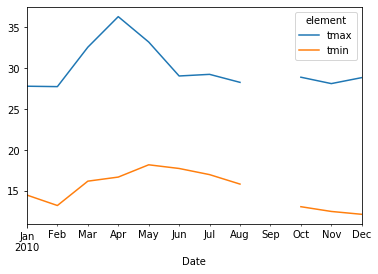

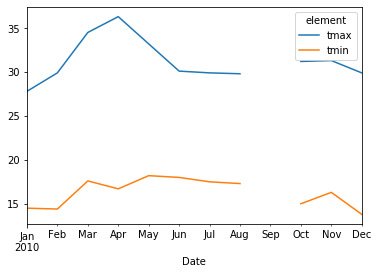

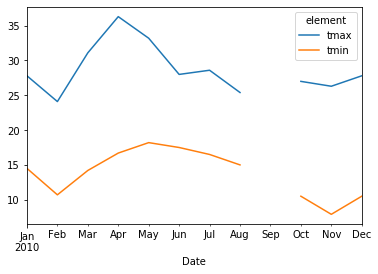

In [32]:
weather_pivot.groupby(pd.Grouper(freq="M")).mean().plot()
weather_pivot.groupby(pd.Grouper(freq="M")).max().plot()
weather_pivot.groupby(pd.Grouper(freq="M")).min().plot()

#moving average monthly + plot


# 7. All days plot

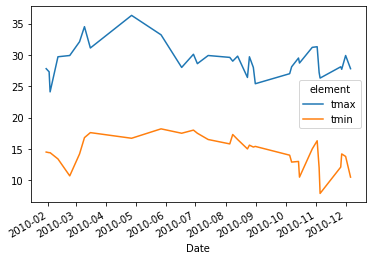

In [34]:
weather_pivot.plot()


# 8. Moving average over 3 days plot

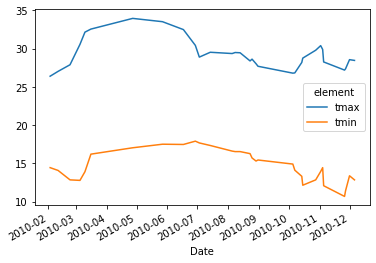

In [36]:
weather_pivot.rolling(window=3).mean().plot()